In [1]:
%matplotlib inline 
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.misc import imread
import os
import glob
from sklearn.metrics import precision_recall_fscore_support, jaccard_similarity_score, confusion_matrix
import metrics

In [2]:
# define the images and annotations path
base_dataset_dir = "/data/Road_and_Buildings_detection_dataset/mass_merged"
train_dataset_base_dir = os.path.join(base_dataset_dir, "test")
images_folder_name = "sat/"
annotations_folder_name = "map/"
train_images_dir = os.path.join(train_dataset_base_dir, images_folder_name)
train_annotations_dir = os.path.join(train_dataset_base_dir, annotations_folder_name)

In [3]:
# read the train.txt file. This file contains the training images' names
file = open(os.path.join(train_dataset_base_dir, "test.txt"), 'r')
images_filename_list = [line for line in file]
number_of_train_examples = len(images_filename_list)
print("number_of_train_examples:", number_of_train_examples)
print(images_filename_list[0])

number_of_train_examples: 10
22828930_15



In [4]:
saito_predictions = glob.glob("/data/SemanticSegmentation/Projects/ssai-cnn/results/test_results_saito_pre_trained/*")

In [5]:
# best sofar: 19321, 7228, 

our_predictions = glob.glob("/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/19209/test/*.npy")
print(sorted(images_filename_list))
print("\n")
print(sorted(our_predictions))

['22828930_15\n', '22828990_15\n', '22829050_15\n', '23429020_15\n', '23429080_15\n', '23578960_15\n', '23579005_15\n', '23729035_15\n', '23879080_15\n', '24179065_15\n']


['/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/19209/test/22828930_15_prediction_np.npy', '/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/19209/test/22828990_15_prediction_np.npy', '/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/19209/test/22829050_15_prediction_np.npy', '/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/19209/test/23429020_15_prediction_np.npy', '/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/19209/test/23429080_15_prediction_np.npy', '/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/19209/test/23578960_15_prediction_np.npy', '/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/19209/test/23579005_15_prediction_np.npy', '/data/SemanticSegmentation/AerialSemanticSegmentation/t

In [6]:
# image_name=our_predictions[7]
# print(image_name)

In [7]:
#ground_truth = imread(train_annotations_dir + "/" + "23729035_15" + ".tif")

In [8]:
# plt.imshow(ground_truth)
# print("ground_truth shape", ground_truth.shape)
# print(ground_truth)

In [9]:
#prediction_img = imread("/home/thalles_silva/log_folder/7228/test/" + image_name + "_pred_label.tiff")
#plt.imshow(prediction_img)
# prediction = np.load(image_name)
# prediction = np.squeeze(prediction)
# print("prediction shape:", prediction.shape)
# print(prediction)
# plt.imshow(prediction)

In [10]:
# int relax_precision(const np::ndarray& predict,
#                     const np::ndarray& label, const int& relax) {
#   const int h_lim             = predict.shape(1);
#   const int w_lim             = predict.shape(0);
#   const int32_t *predict_data =
#     reinterpret_cast<int32_t *>(predict.get_data());
#   const int32_t *label_data =
#     reinterpret_cast<int32_t *>(label.get_data());

#   int true_positive = 0;

#   for (int y = 0; y < h_lim; ++y) {
#     for (int x = 0; x < w_lim; ++x) {
#       const int32_t pred_val = predict_data[y * w_lim + x];

#       if (pred_val == 1) {
#         const int st_y = y - relax >= 0 ? y - relax : 0;
#         const int en_y = y + relax < h_lim ? y + relax : h_lim - 1;
#         const int st_x = x - relax >= 0 ? x - relax : 0;
#         const int en_x = x + relax < w_lim ? x + relax : w_lim - 1;
#         int sum        = 0;

#         for (int yy = st_y; yy <= en_y; ++yy) {
#           for (int xx = st_x; xx <= en_x; ++xx) {
#             sum += label_data[yy * w_lim + xx];
#           }
#         }

#         if (sum > 0) true_positive++;
#       }
#     }
#   }

#   return true_positive;
# }

In [11]:
def relax_precision(predict, label, relax):
    h_lim = predict.shape[0]
    w_lim = predict.shape[1]
    true_positive = 0
    for y in range(h_lim):
        for x in range(w_lim):
            pred_val = predict[y,x]
            
            if (pred_val == 1):
                st_y = y if y - relax >= 0 else 0
                en_y = y + relax if y + relax < h_lim else h_lim - 1
                st_x = x - relax if x - relax >= 0 else 0
                en_x = x + relax if x + relax < w_lim else w_lim - 1
                
                sum = 0
                for yy in range(st_y, en_y+1):
                    for xx in range(st_x, en_x+1):
                        sum += label[yy,xx]
                        
                if (sum > 0): 
                    true_positive+=1
    return true_positive;

In [12]:
# int relax_recall(const np::ndarray predict,
#                  const np::ndarray label, const int& relax) {
#   const int h_lim             = label.shape(1);
#   const int w_lim             = label.shape(0);
#   const int32_t *predict_data =
#     reinterpret_cast<int32_t *>(predict.get_data());
#   const int32_t *label_data =
#     reinterpret_cast<int32_t *>(label.get_data());

#   int true_positive = 0;

#   for (int y = 0; y < h_lim; ++y) {
#     for (int x = 0; x < w_lim; ++x) {
#       const int32_t label_val = label_data[y * w_lim + x];

#       if (label_val == 1) {
#         const int st_y = y - relax >= 0 ? y - relax : 0;
#         const int en_y = y + relax < h_lim ? y + relax : h_lim - 1;
#         const int st_x = x - relax >= 0 ? x - relax : 0;
#         const int en_x = x + relax < w_lim ? x + relax : w_lim - 1;
#         int sum        = 0;

#         for (int yy = st_y; yy <= en_y; ++yy) {
#           for (int xx = st_x; xx <= en_x; ++xx) {
#             sum += predict_data[yy * w_lim + xx];
#           }
#         }

#         if (sum > 0) true_positive++;
#       }
#     }
#   }

#   return true_positive;
# }

In [13]:
def relax_recall(predict, label, relax):
    if predict.shape != label.shape:
        raise("Error, prediction and label must be the same shape")
    
    h_lim = label.shape[0]
    w_lim = label.shape[1]
    true_positive = 0
    
    for y in range(h_lim):
        for x in range(w_lim):
            label_val = label[y, x]
            #print("(y,x)", x,y)
            if (label_val == 1):
                st_y = y - relax if y - relax >= 0 else 0;
                en_y = y + relax if y + relax < h_lim else h_lim - 1
                st_x = x - relax if x - relax >= 0 else 0
                en_x = x + relax if x + relax < w_lim else w_lim - 1;
                sum = 0
                #print(st_y,en_y,st_x,en_x)
                for yy in range(st_y,en_y+1):
                    for xx in range(st_x,en_x+1):
                        #print(yy * w_lim + xx)
                        sum += predict[yy, xx]
                #print("----")
                if (sum > 0):
                    true_positive+=1
    return true_positive

In [14]:
def calc_prec_recall(pred, label, relax):
    if pred.shape != label.shape:
        raise("Error, prediction and label must be the same shape")
    positive = np.sum(pred == 1)
    true = np.sum(label == 1)
    prec_tp = relax_precision(pred, label, relax)
    recall_tp = relax_recall(pred, label, relax)
    
    if prec_tp > positive or recall_tp > true:
        print(positive, prec_tp, true, recall_tp)
        sys.exit('Calculation is wrong.')

    prec = prec_tp / float(positive) if positive > 0 else 1.0
    recall = recall_tp / float(true) if true > 0 else 1.0

    return (prec, recall)

In [15]:
# Model_id: 11270: EldNet-8
# Model_id: 19325: EldNet-4
# Model id: 12887: Deeplab-8 
# Model id: 26459: Deeplab-4

In [16]:
y_true = np.array([[0,1], [0,0]])
y_pred = np.array([[1,1], [1,0]])

In [17]:
print(y_true.flatten())
print(y_pred.flatten())
tn, fp, fn, tp = confusion_matrix(y_true.flatten(), y_pred.flatten()).ravel()
print("tn:", tn, "fp:", fp, "fn:", fn, "tp:", tp)

print("---> ", (tp / (tp + fp + fn)))

jacard_index = jaccard_similarity_score(y_true.flatten(), y_pred.flatten(), normalize=True)
mean_IU = metrics.mean_IU(y_pred, y_true)
pixel_accuracy = metrics.pixel_accuracy(y_pred, y_true)
mean_accuracy = metrics.mean_accuracy(y_pred, y_true)
frequency_weighted_IU = metrics.frequency_weighted_IU(y_pred, y_true)


print("frequency_weighted_IU",frequency_weighted_IU)
print("mean_IU",mean_IU)
print("pixel_accuracy:",pixel_accuracy)
print("mean_accuracy",mean_accuracy)
print("jacard_index", jacard_index)

[0 1 0 0]
[1 1 1 0]
tn: 1 fp: 2 fn: 0 tp: 1
--->  0.333333333333
frequency_weighted_IU 0.333333333333
mean_IU 0.333333333333
pixel_accuracy: 0.5
mean_accuracy 0.666666666667
jacard_index 0.5


In [25]:
import tensorflow as tf
y_true_tf = tf.constant([[0,1], [0,0]])
y_pred_tf = tf.constant([[1,1], [1,0]])
mean_ui, update_op = tf.metrics.mean_iou(y_true_tf, y_pred_tf, 2)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    update_op.eval()
    print(mean_ui.eval())

0.333333


In [22]:
relax_factor = 3
model_id = 19209
for class_id in [1,2]:
    print("Statistics for class:", class_id)
    
    mean_precision = []
    mean_recall = []
    mean_f1 = []
    jaccard_average_similarity = []
    mean_IoU_list = []
    freq_IoU_list = []
    mean_acc_list = []
    pixel_acc_list = []
    
    # loop though all predicted images and ground thruths
    for image_name in images_filename_list:

        #prediction = np.load("/home/thalles_silva/log_folder/" + str(model_id) + "/test/" + image_name.strip() + "_prediction_np.npy")
        #/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/19209
        prediction = np.load("/data/SemanticSegmentation/AerialSemanticSegmentation/tboard_logs/" + str(model_id) + "/test/" + image_name.strip() + "_prediction_np.npy")
        #prediction = np.load("/home/thalles_silva/DataPublic/SemanticSegmentation/Projects/ssai-cnn/results/test_results_saito_pre_trained/" + image_name.strip() + "_pred_argmax.npy")
        prediction = np.squeeze(prediction)
        #print(prediction.shape)
        
        prediction_binary = np.zeros(prediction.shape, dtype=np.uint8)
        label_binary = np.zeros(prediction.shape, dtype=np.uint8)
        
        ground_truth = imread(train_annotations_dir + "/" + image_name.strip() + ".tif")
        ground_truth = ground_truth[14:1486,14:1486]
        #print(ground_truth.shape)
        
        prediction_binary[np.where(prediction==class_id)] = 1
        label_binary[np.where(ground_truth==class_id)] = 1

        prec, recall = calc_prec_recall(prediction_binary, label_binary, relax_factor)
        f_measure = 2 * (prec * recall) / (prec + recall) 
        
        jacard_index = jaccard_similarity_score(label_binary, prediction_binary, normalize=True)
        
        IoU = metrics.mean_IU(label_binary, prediction_binary)
        freq_IoU = metrics.frequency_weighted_IU(prediction_binary, label_binary)
        mean_acc = metrics.mean_accuracy(prediction_binary, label_binary)
        pixel_acc = metrics.pixel_accuracy(prediction_binary, label_binary)

        jaccard_average_similarity.append(jacard_index)
        
        mean_precision.append(prec)
        mean_recall.append(recall)
        mean_f1.append(f_measure)
        
        mean_IoU_list.append(IoU)
        freq_IoU_list.append(freq_IoU)
        mean_acc_list.append(mean_acc)
        pixel_acc_list.append(pixel_acc)
        
        #print(precision_recall_fscore_support(label_binary, prediction_binary, average='weighted'))
        
        #print(image_name.strip(), "-->", prec, recall, f_measure, jacard_index, IoU)
        
    print("Mean prec:", np.mean(mean_precision), "Mean recall:", np.mean(mean_recall), "Mean f1:", np.mean(mean_f1), "Jaccard Index", np.mean(jaccard_average_similarity))
    print("Mean IoU:", np.mean(mean_IoU_list), "Mean freq IoU:", np.mean(freq_IoU_list), "Mean acc:", np.mean(mean_acc_list), "Mean pixel acc:", np.mean(pixel_acc_list))
    print("---------------")

Statistics for class: 1
Mean prec: 0.95760614423 Mean recall: 0.939589730853 Mean f1: 0.94844680884 Jaccard Index 0.643702976743
Mean IoU: 0.781901556874 Mean freq IoU: 0.870058219769 Mean acc: 0.860078877442 Mean pixel acc: 0.927870798381
---------------
Statistics for class: 2
Mean prec: 0.898576473528 Mean recall: 0.86185994653 Mean f1: 0.879539077683 Jaccard Index 0.549832050963
Mean IoU: 0.743775267147 Mean freq IoU: 0.892331439311 Mean acc: 0.828561984533 Mean pixel acc: 0.938635646193
---------------


(1500, 1500)
(1500, 1500)


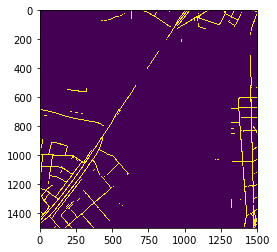

In [160]:
print(prediction.shape)
print(ground_truth.shape)

class_id = 2
prediction_binary = np.zeros((1500,1500), dtype=np.uint8)
label_binary = np.zeros((1500,1500), dtype=np.uint8)


prediction_binary[np.where(prediction==class_id)] = 1
label_binary[np.where(ground_truth==class_id)] = 1

plt.imshow(prediction_binary)
plt.show()

In [161]:
prec, recall = calc_prec_recall(prediction_binary, label_binary, 3)

In [162]:
f_measure = 2 * (prec * recall) / (prec + recall) 

In [163]:
print(prec, recall, f_measure)

0.7896968655091399 0.7240775016736896 0.7554649435920076


In [36]:
y_pred = np.array([1,1,1,1,1])
y_true = np.array([1,1,1,1,1])

print(sum((y_pred == y_true).astype(int))/5)

1.0
